In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.constraints import max_norm
from keras.utils.vis_utils import plot_model
plt.rcParams['figure.figsize'] = (12,12)

In [16]:
def print_loaded_images(X_train, y_train):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(X_train[i].reshape(28,28), interpolation='none')
        plt.title("Class {}".format(y_train[i]))

In [17]:
def load_fresh_data():
    # load dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    # reshape the data which has images with 28 by 28 pixels to have a single channel
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    # Normalize the Pixel values
    X_train /= 255
    X_test /= 255    
    
    # Converting labels to catagorical variable 
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    
    return X_train, X_test, Y_train, Y_test, y_test

In [18]:
def get_noisy_data_2(noise_factor  = 0.25):
    X_train, X_test, Y_train, Y_test, y_test = load_fresh_data()
    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)
    
    X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
    X_test_noisy = np.clip(X_test_noisy, 0., 1.)
    return X_train_noisy, X_test_noisy, Y_train, Y_test, y_test

In [19]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
def train_model(model, X_train, Y_train, epochs=4):
    model.fit(X_train, Y_train,
          batch_size=128, epochs=epochs,
         verbose=1,
          validation_data=(X_test, Y_test))
    return model

In [21]:
def predict_using_model(model, X_test, y_test):
    predicted_classes = model.predict_classes(X_test)
    correct_indices = np.nonzero(predicted_classes == y_test)[0]
    incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
    return predicted_classes, correct_indices, incorrect_indices

In [22]:
def plot_image(predicted_classes, indices, y_test ):
    plt.figure()
    for i, val in enumerate(indices[:9]):
        plt.subplot(3,3,i+1)
        plt.imshow(X_test[val].reshape(28,28), interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[val], y_test[val]))

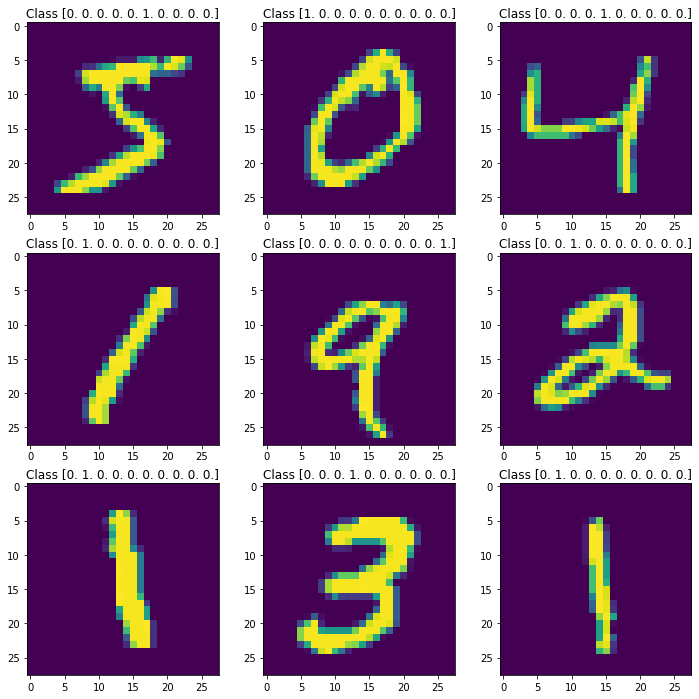

In [26]:
X_train, X_test, Y_train, Y_test, y_test = load_fresh_data()
print_loaded_images(X_train, Y_train)

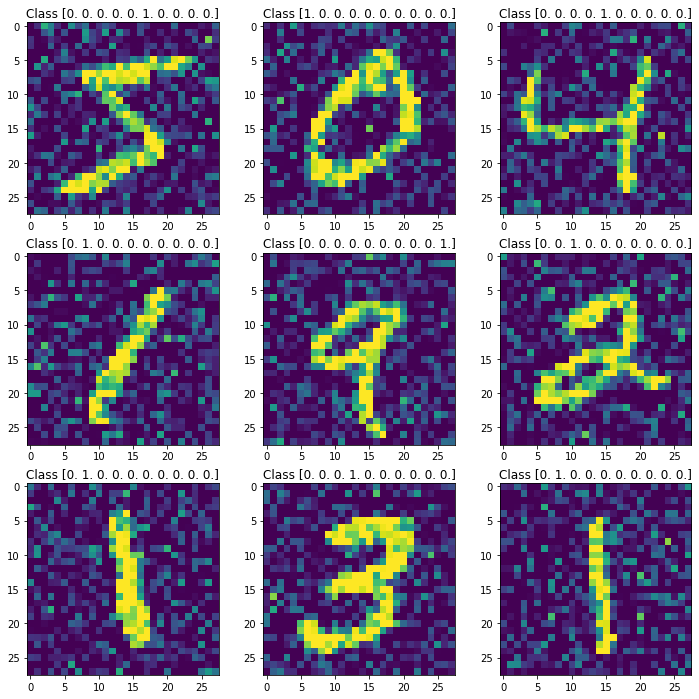

In [25]:
X_train_noisy, X_test_noisy, Y_train, Y_test, y_test = get_noisy_data_2(noise_factor  = 0.25)
print_loaded_images(X_train_noisy, Y_train)

Epoch 1/4
469/469 [==============================] - 23s 48ms/step - loss: 0.2654 - accuracy: 0.9202 - val_loss: 0.1377 - val_accuracy: 0.9596
Epoch 2/4
469/469 [==============================] - 22s 47ms/step - loss: 0.1066 - accuracy: 0.9688 - val_loss: 0.0901 - val_accuracy: 0.9728
Epoch 3/4
469/469 [==============================] - 22s 48ms/step - loss: 0.0732 - accuracy: 0.9784 - val_loss: 0.0643 - val_accuracy: 0.9804
Epoch 4/4
469/469 [==============================] - 23s 48ms/step - loss: 0.0556 - accuracy: 0.9843 - val_loss: 0.0564 - val_accuracy: 0.9822
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Model: "sequential"
_________________________________________________________________
Layer (t

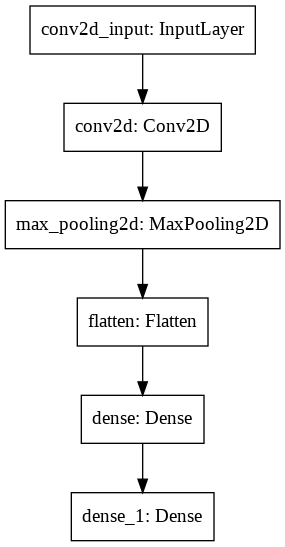

In [30]:
model = get_model()
model = train_model(model, X_train, Y_train, epochs=4)
predicted_classes, correct_indices, incorrect_indices = predict_using_model(model, X_test, y_test)
model.summary()
plot_model(model, to_file='model.png')